<center>
<h1>Homework Assignment 4</h1>
<br>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>
<h3>Due date: 2/20/2018 23:55</h3>
</center> 

### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.

# Support vector machine

The questions are from the book "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani.

The book can be downloaded from the following link: <a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>

## Student Name: Yaruo Zhang

## (1) Chapter 9, exercise 1

## This problem involves hyperplanes in two dimensions.
  
  
 (a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
 points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.
   
   

In [3]:
# write solution here
#1.A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import svm
import matplotlib.lines as mlines
%matplotlib inline

df = pd.read_csv('data_nonlinear.csv')
df.head(5)

,x1,x2,y
0,-0.112912,0.070666,1
1,-0.278967,0.108386,1
2,-0.219224,-0.329693,-1
3,-0.000366,-0.029985,-1
4,-0.000218,-0.051468,-1


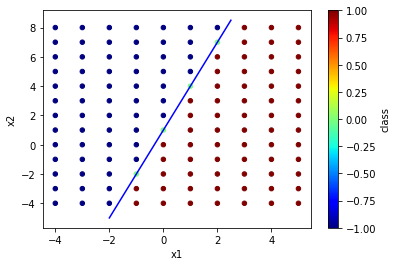

In [40]:
def f(x1,x2):
    return(np.sign(1 +3*x1 -x2))

df1=pd.DataFrame(data=[(i,j,f(i,j)) for i in range(-4,6) for j in range(-4,9)], columns=['x1','x2','class'])


df1.plot.scatter(x='x1', y='x2', c='class',cmap='jet',sharex=False)
plt.plot([-2,2.5],[-5,8.5],'b')

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2 + X1 + 2X2 > 0, as well as the set of points for which −2 + X1 + 2X2 < 0.


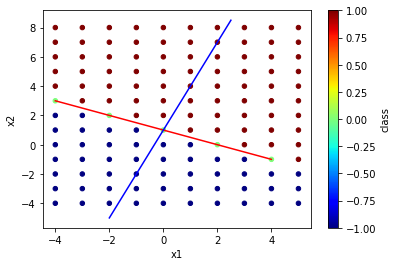

In [41]:
def f2(x1,x2):
    return(np.sign(-2 +x1 +2*x2))

df2=pd.DataFrame(data=[(i,j,f2(i,j)) for i in range(-4,6) for j in range(-4,9)], columns=['x1','x2','class'])

df2.plot.scatter(x='x1', y='x2', c='class',cmap='jet',sharex=False)
plt.plot([-4,4], [3, -1],'r')
plt.plot([-2,2.5],[-5,8.5],'b')

## (2) Chapter 9, exercise 3


## 1.3.a Sketch the observations.


In [1]:
data1_3={'Obs':[1,2,3,4,5,6,7],
      'X1':[3,2,4,1,2,4,4],
     'X2':[4,2,4,4,1,3,1], 'Y':['Red','Red','Red','Red','Blue','Blue','Blue']}

In [4]:
df=pd.DataFrame(data=data1_3)
df

,Obs,X1,X2,Y
0,1,3,4,Red
1,2,2,2,Red
2,3,4,4,Red
3,4,1,4,Red
4,5,2,1,Blue
5,6,4,3,Blue
6,7,4,1,Blue


In [5]:
colors=df['Y']
C = []
for i in colors:
    if i == 'Blue':
        C.append(-1)
    else:
        C.append(1)
C

[1, 1, 1, 1, -1, -1, -1]

In [6]:
df['c']=C
df

,Obs,X1,X2,Y,c
0,1,3,4,Red,1
1,2,2,2,Red,1
2,3,4,4,Red,1
3,4,1,4,Red,1
4,5,2,1,Blue,-1
5,6,4,3,Blue,-1
6,7,4,1,Blue,-1


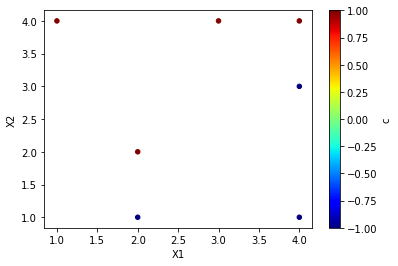

In [7]:
df.plot.scatter(x='X1', y='X2', c='c', cmap='jet', sharex=False)

## (b) Sketch the optimal separating hyperplane, and provide the equationfor this hyperplane (of the form (9.1)).


In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['X1','X2']], df['c'])

SVC(C=10000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# print beta (the hyperplane coefficents) and the support vectors
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)

beta0=  1.00 
beta1= -2.00 
beta2=  2.00
Margin: 0.353657001043
support vectors indexes: [4 5 1 2]


(0, 5)

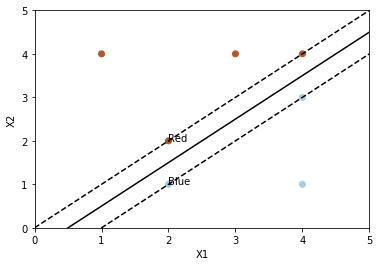

In [70]:


ax.scatter(df['X1'], df['X2'], c=df['c'], cmap=plt.cm.Paired)
X1_range = [0,5]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k')
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.text(2, 1, 'Blue')
ax.text(2, 2, 'Red')
ax.set_xlim([0,5])
ax.set_ylim([0,5])    

## (c) Describe the classification rule for the maximal margin classifier. 

It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

 - The equation is -1 + 2*x1 - 2*x2 =0 
 - we will classify to Red in following if -1 +2*x1 -2*x2 <0 ,classify to red if otherwise.

## (d) On your sketch, indicate the margin for the maximal margin hyperplane.

* The margin is 0.353657001043

## (e) Indicate the support vectors for the maximal margin classifier.

* the support vectors for the maximal margin classifier are observation 2,3,5,6

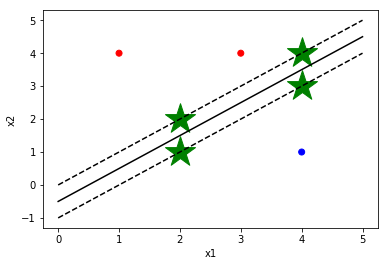

In [17]:
fig, ax = plt.subplots()
X1_range = [0,5]
color = {'Red' : 'red', 'Blue':'blue'}
ax.scatter(x=df['X1'], y=df['X2'], c = df['Y'].apply(lambda x: color[x]))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')
ax.plot(X1_range,X2_hyperplane,'-k')
ax.scatter(x = [2,4,2,4], y = [1,3,2,4], marker = '*', c = 'g', s = 1000)

## (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

- since observation 7 is not supprt vector, it is not the nearest point to the hyperplane(instead, it is far away from boundary), location of it will not affect maximal margin hyperplane


## (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.


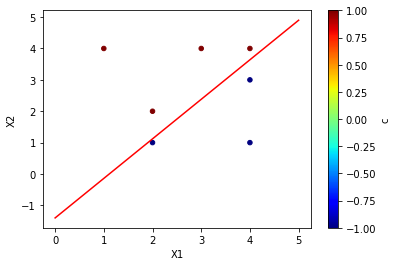

In [77]:
df.plot.scatter(x='X1', y='X2', c='c', cmap='jet', sharex=False)
plt.plot([0,5],[-1.4,4.9],'r')

In [29]:

# Define the known points
x1 = [0,5]
x2 = [-1.4,4.9]

coefficients = np.polyfit(x1, x2, 1)

print ('β1 =', coefficients[0])
print ('β0 =', coefficients[1])

β1 = 1.26
β0 = -1.4


### And I will train a model which is not optimal- ANOTHER METHOD


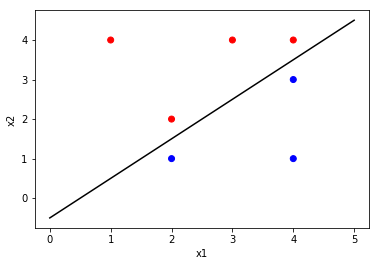

In [20]:
fig, ax = plt.subplots()
ax.scatter(x=df['X1'], y=df['X2'], c = df['Y'].apply(lambda x: color[x]))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.plot(X1_range,X2_hyperplane,'-k')


In [21]:
clf_no = svm.SVC(kernel = 'linear')
clf_no.fit(df[['X1','X2']],df['Y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
beta1n,beta2n = clf_no.coef_[0]
beta0n = clf_no.intercept_[0]
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0n,beta1n,beta2))

beta0= -0.85 
beta1= -0.62 
beta2=  2.00


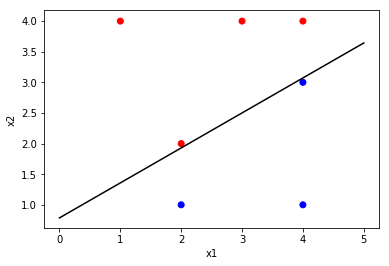

In [28]:
fig, ax = plt.subplots()
ax.scatter(x=df['X1'], y=df['X2'], c = df['Y'].apply(lambda x: color[x]))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

X1_range = [0,5]
X2_hyperplane = list(map(lambda x1:(-beta0n-beta1n*x1)/beta2n, X1_range))
ax.plot(X1_range,X2_hyperplane,'-k')

## (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

In [116]:
df.loc[-1] = [8,3,1,'Red',1] 
df

,Obs,X1,X2,Y,c
0,1,3,4,Red,1
1,2,2,2,Red,1
2,3,4,4,Red,1
3,4,1,4,Red,1
4,5,2,1,Blue,-1
5,6,4,3,Blue,-1
6,7,4,1,Blue,-1
-1,8,3,1,Red,1


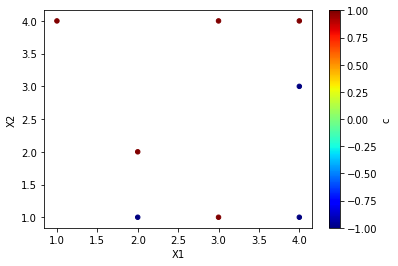

In [117]:
df.plot.scatter(x='X1', y='X2', c='c', cmap='jet', sharex=False)

## (3) Feature expansion

The file 'data_nonlinear.csv' contains data for binary classification. 
1. Visualize the data.
2. Is the data linearly separable? explain your answer.
3. Construct an SVM classifier with polynomial kernel of degree 2 that perfectly classifies the dataset.
4. Expand the feature space and run a logistic regression model that attains perfect classification of the dataset. 
5. Is the logistic regression a linear model? explain your answer. 

In [4]:
# write solution here
df3 = pd.read_csv('data_nonlinear.csv')
df3.head(5)

,x1,x2,y
0,-0.112912,0.070666,1
1,-0.278967,0.108386,1
2,-0.219224,-0.329693,-1
3,-0.000366,-0.029985,-1
4,-0.000218,-0.051468,-1


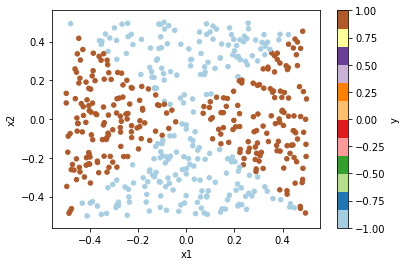

In [120]:
#3.1 visulalize the data
df3.plot.scatter(x='x1', y='x2', c='y', cmap=plt.cm.Paired, sharex=False)

# 3.2: The data is not linear-seperable.


Because we know two sets are linearly separable if and only if their convex hull has no intersection. We can the see from above plot that lines seperating blue and red points must be crossed  arount point(0,0).

# 3.3: Construct an SVM classifier with polynomial kernel of degree 2 that perfectly classifies the dataset.

In [5]:
clf = svm.SVC(kernel='poly', degree=2, C=10) # fit SVM with polynomial kernel 
clf.fit(df3[['x1','x2']], df3['y'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

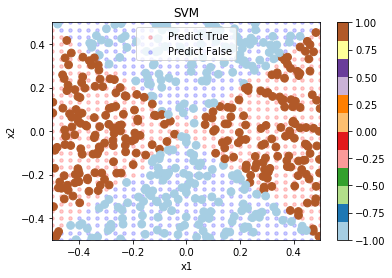

In [7]:
# plot predictions
fig, ax = plt.subplots()
l=0.5
support = [(i,j) for i in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
df3_background = pd.DataFrame(data=support, columns=['x1','x2'])
df3_background['prediction']=clf.predict(support) 
df3_background[df3_background['prediction']==1].plot.scatter('x1','x2',color='r', alpha=.2, s=12,ax=ax,label='Predict True')
df3_background[df3_background['prediction']==-1].plot.scatter('x1','x2',color='b',alpha=.2, s=12,ax=ax,label='Predict False')
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])

# plot observations
plt.scatter(df3['x1'], df3['x2'], c=df3['y'], cmap=plt.cm.Paired,s=60)
plt.title('SVM')
plt.colorbar()
# plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')


# 3.4 Expand the feature space and run a logistic regression model that attains perfect classification of the dataset.

In [15]:
from sklearn import linear_model
df3['x1^2'] = df3['x1']**2
df3['x2^2'] = df3['x2']**2

In [16]:
clf2 = linear_model.LogisticRegression(C = 10**10)
clf2.fit(df3[['x1^2','x2^2']], df3['y'])

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

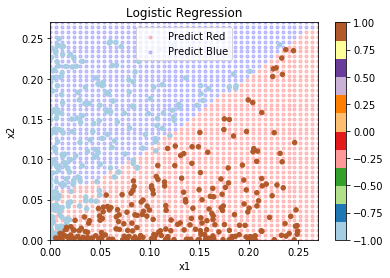

In [17]:
fig, ax = plt.subplots()

support = [(i,j) for i in np.linspace(0,0.3,51) for j in np.linspace(0,0.3,51)]
df_background = pd.DataFrame(data=support, columns=['x1','x2'])
df_background['prediction']=clf.predict(support) 
df_background[df_background['prediction']==1].plot.scatter('x1','x2',color='r', alpha=.2, s=10,ax=ax,label='Predict Red')
df_background[df_background['prediction']==-1].plot.scatter('x1','x2',color='b',alpha=.2, s=10,ax=ax,label='Predict Blue')
ax.set_xlim([0,0.27])
ax.set_ylim([0,0.27])

plt.scatter(df3['x1^2'], df3['x2^2'], c=df3['y'], cmap=plt.cm.Paired,s=20)
plt.title('Logistic Regression')
plt.colorbar()
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')

## 3.5  Is the logistic regression a linear model? 


- This dataset is linearly separable.

- As we can see from plot above, after expanding the feature space, the data points become linearly separable-which is different from the first plot in this part. 

- We can also see the logistic regression can split the dataset perfectly in two categories.


## (4) Exercises from "Hands-on ML with scikit-learn and TensorFlow"

Read chapter 5 in "Hands-on ML with scikit-learn and TensorFlow" by Aurelien Geron.  

__Mandatory__: Answer questions 1-6 from the exercise section at the end of the chapter.

# 4.1 What is the fundamental idea behind Support Vector Machines?

The fundamental idea behind Support Vector Machines is to find the best way to seprate defferent classes of data by a single 'road'(we call it as hyperplane, but I will refer to it as road in following to make my statement understandable ). Our job is to make the road could divide data correctly in several sides and at the same time, best in application of other data sets as well.

We also have to answer the question of best: how do we decide how wide the road is/which road is the best among all potential roads? Answers to above questions could be listed as follows: the nearest data to the road is called support vectors. Distance between support vectors to road is defined as margin. Regarding question of best road, we take road with largest margin as the best road.

It is possible that data might locate on wrong side of road, that when we call width 'soft margin'. It could be avoided by setting particular parameters, but we will face overfitting problem - which means application of the road in other data set is not optimal. Crompromise between overfitting and accuracy is normal, also inevitable problem in classifying observations.  




# 4.2 What is a support vector?

As I mentioned above, nearest observation of data to the 'road' are support vectors. They are the determinating factors in shaping the road. Little change among them will affect defination of decision boundary in data set. 

# 4.3  Why is it important to scale the inputs when using SVMs?

The reason of scalling is so important in SVM is that feature of small number might be ignored in setting linear boundary process. 
The kernel trick used in SVMs depends on inner products between training examples. If one component is much larger than the others, then it will affect the inner product more than the others, which means the classifier won't care about most of the other features.



# 4.4    Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

It can output score of the distance between intance and decision boundary, like we did in part 3, mean in df3 are scores of different classifiers with different parameters.

But,score can not be used to obtain probablity.


# 4.5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?


Under such case, primal form of SVM is prefferd. Since number of instances are so large to be millions, the dual form can not handle such enormous data,



# 4.6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set:should you increase or decrease γ (gamma)? What about C?

We could increase gamma to solve the problem of underfit, since higher value of gamma is helpful in enhancing fit level of data. You could also increase C to let computation know that you are unhappy about underfit situation and will penalize highly on misclassified observations.